In [2]:
%matplotlib inline
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

[10.71428571  5.        ]


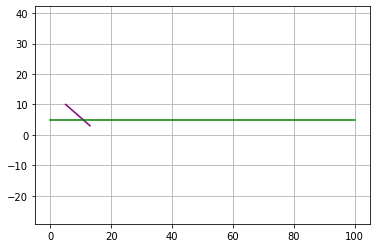

In [4]:
plt.axis('equal')
plt.grid(True, which='both')

class DoNotIntercept(Exception):
    pass
# https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection (Given two points on each line segment)
# generalized aproach for vectors which calculates exact point
def calc_interception_point(line1, line2): 
    v1, v2 = line1
    v3, v4 = line2
    t_denominator = np.linalg.det(np.matrix([v2-v1, v4-v3]))
    if t_denominator == 0:
        raise DoNotIntercept
    t_numerator = np.linalg.det(np.matrix([v3-v1, v4-v3]))
    if (t_numerator > 0 and t_denominator < 0) or\
        (t_numerator < 0 and t_denominator > 0) or\
        (t_numerator > t_denominator and t_numerator > 0) or\
        (t_numerator < t_denominator and t_numerator < 0):
        raise DoNotIntercept
    u_denominator = np.linalg.det(np.matrix([v2-v1, v4-v3]))
    if u_denominator == 0:
        raise DoNotIntercept
    u_numerator = np.linalg.det(np.matrix([v1-v2, v3-v1]))
    if (u_numerator > 0 and u_denominator < 0) or\
        (u_numerator < 0 and u_denominator > 0) or\
        (u_numerator > u_denominator and u_numerator > 0) or\
        (u_numerator < u_denominator and u_numerator < 0):
        raise DoNotIntercept
    t = t_numerator / t_denominator
    return v1 + t*(v2-v1)

line1 = np.array([
    [13, 3],
    [5, 10]
])
line2 = np.array([
    [0, 5],
    [100, 5],
])

plt.plot(*line1.T, color='purple')
plt.plot(*line2.T, color='green')

try:
    print(calc_interception_point(line1, line2))
except DoNotIntercept:
    print('do not intercept')